     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


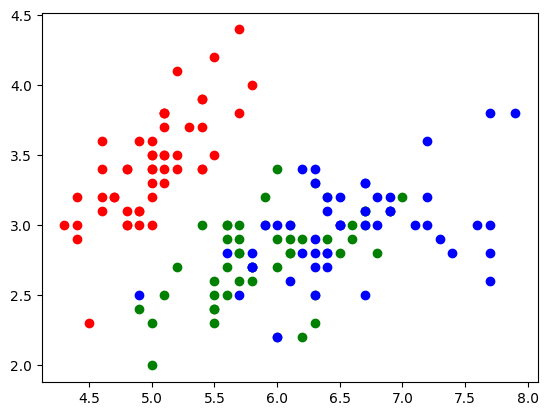

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def irisclass(a):
# used to assign a value based on the species column
# input needs to be a string, in most cases looks like: irisclass(iris["species"][i])
    if a=="setosa":
        return 0
    elif a=="versicolor":
        return 1
    elif a=="virginica":
        return 2
    else :
        return 3 #shouldn't happen

def getcolor(a):
#used to plot the data
# input needs to be a string, in most cases looks like: getcolor(iris["species"][i])
    if a=="setosa":
        return "red"
    elif a=="versicolor":
        return "green"
    elif a=="virginica":
        return "blue"
    else :
        return "yellow" #shouldn't happen
        
iris=sns.load_dataset("iris")
print (iris)

fig,ax=plt.subplots()
for i in range(iris.shape[0]):
    ax.scatter(iris["sepal_length"][i],iris["sepal_width"][i],c=getcolor(iris["species"][i]))
plt.show()

In [2]:
mu_0=np.zeros(4)
mu_1=np.zeros(4)
mu_2=np.zeros(4)

sig_0=np.array([np.zeros(4),np.zeros(4),np.zeros(4),np.zeros(4)])
sig_1=np.array([np.zeros(4),np.zeros(4),np.zeros(4),np.zeros(4)])
sig_2=np.array([np.zeros(4),np.zeros(4),np.zeros(4),np.zeros(4)])

# training input
x_train=np.zeros((150,5))
for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]-1):
        x_train[i][j]=(iris.iloc[i:i+1,j:j+1].to_numpy()).item()
    x_train[i][4]=irisclass(iris["species"][i])


def getmu(x_train, l):
#l is the class concerned
    tot=np.zeros(4)
    s=0
    for i in range(x_train.shape[0]):
        if x_train[i][4]==l:
            s+=1
            tot+=x_train[i][:4]
    return tot*(1/s)

def getsig(x_train,mu_l,l):
#l is the class concerned
#mu_l needs to be computed first
    tot=np.array([np.zeros(4),np.zeros(4),np.zeros(4),np.zeros(4)])
    
    for i in range(x_train.shape[0]):
        if x_train[i][4]==l:
            tot+=np.outer((x_train[i][:4]-mu_l),(x_train[i][:4]-mu_l).T)
    return tot*(1/x_train.shape[0])

def prob(z,mu,sig):
#normal distribution formula
#we don't calculate the exact probabilities but given that the dataset has an equal amount of data for each class, this is good enough for our purpose
    frac=1/((2*np.pi)**(4/2))*(np.linalg.det(sig)**(1/2))
    ex=np.exp((-1/2)*(np.dot(np.dot((z-mu),np.linalg.inv(sig)),(z-mu).T)))
    return frac*ex

mu_0=getmu(x_train,0)
mu_1=getmu(x_train,1)
mu_2=getmu(x_train,2)
print (mu_0,mu_1,mu_2)
sig_0=getsig(x_train,mu_0,0)
sig_1=getsig(x_train,mu_1,1)
sig_2=getsig(x_train,mu_2,2)
print (sig_0,"\n\n",sig_1,"\n\n",sig_2)

[5.006 3.428 1.462 0.246] [5.936 2.77  4.26  1.326] [6.588 2.974 5.552 2.026]
[[0.040588   0.03241067 0.00534267 0.00337467]
 [0.03241067 0.04693867 0.00382133 0.00303733]
 [0.00534267 0.00382133 0.009852   0.00198267]
 [0.00337467 0.00303733 0.00198267 0.003628  ]] 

 [[0.08703467 0.02782667 0.05974667 0.01822133]
 [0.02782667 0.03216667 0.027      0.01346   ]
 [0.05974667 0.027      0.07213333 0.02388   ]
 [0.01822133 0.01346    0.02388    0.01277467]] 

 [[0.13208533 0.03062933 0.09907467 0.01603733]
 [0.03062933 0.03397467 0.02331733 0.01555867]
 [0.09907467 0.02331733 0.09949867 0.01594933]
 [0.01603733 0.01555867 0.01594933 0.02464133]]


(2.0, 4.4)

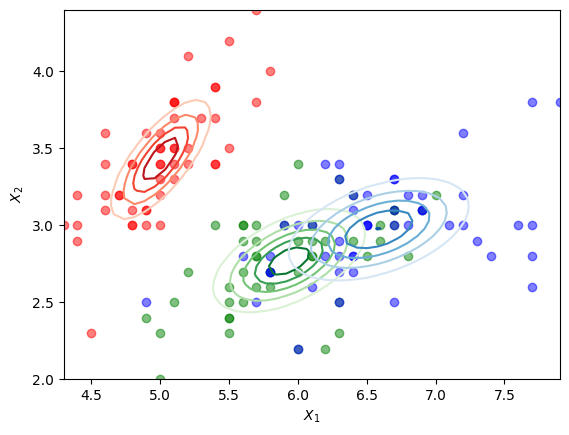

In [3]:
x1_min, x1_max = x_train[:,0].min(), x_train[:,0].max(),
x2_min, x2_max = x_train[:,1].min(), x_train[:,1].max(),

fig,ax = plt.subplots()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
probsr=np.zeros(grid.shape[0])
probsg=np.zeros(grid.shape[0])
probsb=np.zeros(grid.shape[0])

for i in range (grid.shape[0]):
    probsr[i] = prob(grid[i], mu_0[:2],sig_0[:2,:2])
    probsg[i] = prob(grid[i], mu_1[:2],sig_1[:2,:2])
    probsb[i] = prob(grid[i], mu_2[:2],sig_2[:2,:2])
    
probsr = probsr.reshape(xx1.shape)
probsg = probsg.reshape(xx1.shape)
probsb = probsb.reshape(xx1.shape)

# plot contours
plt.contour(xx1, xx2, probsr, levels=5, cmap=plt.cm.Reds, alpha=1)
plt.contour(xx1, xx2, probsg, levels=5, cmap=plt.cm.Greens, alpha=1)
plt.contour(xx1, xx2, probsb, levels=5, cmap=plt.cm.Blues, alpha=1)

for i in range(iris.shape[0]):
    ax.scatter(iris["sepal_length"][i],iris["sepal_width"][i],c=getcolor(iris["species"][i]),alpha=0.5)
    
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])